ここではキノコがが有毒か否かを判別するシステムをCNNを用いて構築する

利用するデータセット：UCI機械学習レポジトリが提供するキノコのデータセット

データセットには61069種のキノコのデータセットがあり、それぞれ食用（e）と有毒（p）に分けられている。


以下にデータセットから与えられるキノコの特徴量を記述する。

cap-diameter：傘の直径

cap-shape：傘の形状(鐘型（B）、円錐（C）、凸（x）、フラット（F）沈んだ形（S）、球型（P）)

cap-surface：キノコの表面（繊維状（I）、溝（G）、鱗状（Y）、滑らか（S）、光沢（H）、革状（L）、絹状（K）、粘着性（T）、しわ（W）、肉質（E））

cap-color：キャップの色（茶色（N）、バフ（B）、灰色（G）、緑（R）、ピンク（P）、紫（U）、赤（E）、白（W）、黄色（Y）、青（L）、オレンジ（O））


データセットの引用先：https://archive.ics.uci.edu/ml/datasets/Mushroom


必要なモジュールのインポート

In [47]:
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv1D,MaxPooling1D
from keras.optimizers import RMSprop

データの読み込み

In [48]:
#今回利用するデータは区切り文字が";"であるためsepに設定する
df = pd.read_csv('secondary_data.csv',sep=";")

print(df)
print(df.shape)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

入力と出力の分割

In [49]:
#入力(特徴量)と出力(目的変数)の分割
X = df.iloc[:,1:5]

#ラベルエンコーダの定義
le = LabelEncoder()
#ラベルエンコーディング
X['cap-shape'] = le.fit_transform(df['cap-shape'])
X['cap-surface'] = le.fit_transform(df['cap-surface'])
X['cap-color'] = le.fit_transform(df['cap-color'])
X = (X - X.mean())/X.std()

y = df['class']
y = pd.get_dummies(y)
print(y)

       e  p
0      0  1
1      0  1
2      0  1
3      0  1
4      0  1
...   .. ..
61064  0  1
61065  0  1
61066  0  1
61067  0  1
61068  0  1

[61069 rows x 2 columns]


データの分割

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42748, 4) (18321, 4) (42748, 2) (18321, 2)


モデルの定義とコンパイル

In [74]:
# 入力層の作成
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(X.shape[1],-1), input_shape=(X.shape[1],)),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPool1D(pool_size=2),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(2, activation='softmax')
])

# モデルのコンパイル
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

データの学習

In [75]:
epochs = 1000
batch_size = 64
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/1000
668/668 - 3s - loss: 0.6536 - accuracy: 0.5989 - val_loss: 0.6312 - val_accuracy: 0.6318 - 3s/epoch - 4ms/step
Epoch 2/1000
668/668 - 2s - loss: 0.6329 - accuracy: 0.6256 - val_loss: 0.6102 - val_accuracy: 0.6500 - 2s/epoch - 3ms/step
Epoch 3/1000
668/668 - 2s - loss: 0.6145 - accuracy: 0.6494 - val_loss: 0.5905 - val_accuracy: 0.6812 - 2s/epoch - 3ms/step
Epoch 4/1000
668/668 - 2s - loss: 0.5979 - accuracy: 0.6667 - val_loss: 0.5714 - val_accuracy: 0.6897 - 2s/epoch - 3ms/step
Epoch 5/1000
668/668 - 2s - loss: 0.5850 - accuracy: 0.6759 - val_loss: 0.5555 - val_accuracy: 0.6967 - 2s/epoch - 3ms/step
Epoch 6/1000
668/668 - 2s - loss: 0.5729 - accuracy: 0.6870 - val_loss: 0.5455 - val_accuracy: 0.7095 - 2s/epoch - 3ms/step
Epoch 7/1000
668/668 - 2s - loss: 0.5600 - accuracy: 0.6973 - val_loss: 0.5290 - val_accuracy: 0.7158 - 2s/epoch - 3ms/step
Epoch 8/1000
668/668 - 2s - loss: 0.5553 - accuracy: 0.7013 - val_loss: 0.5212 - val_accuracy: 0.7236 - 2s/epoch - 3ms/step
Epoch 9/

In [77]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print('\nTest accuracy:',test_acc)

573/573 - 1s - loss: 0.3372 - accuracy: 0.8513 - 1s/epoch - 2ms/step

Test accuracy: 0.8512635827064514


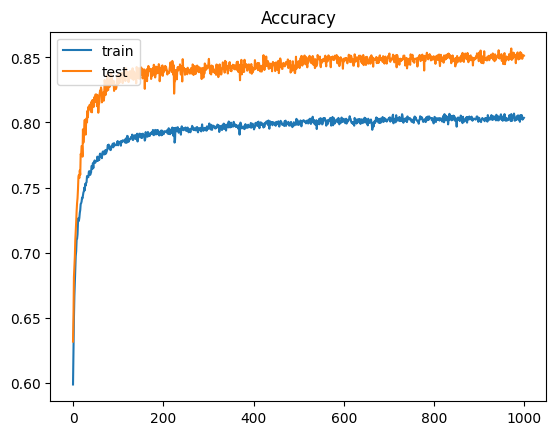

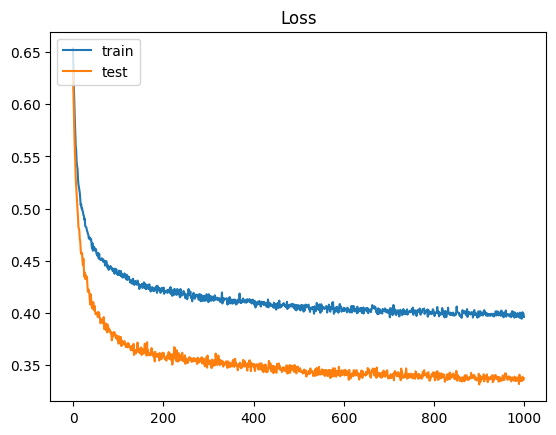

In [80]:
#正解率の推移
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#ロスの推移
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [78]:
y_pred = model.predict(X_test)
#y_predが0.5より大きい場合は1を返し、そうでないときは0を返す
y_pred = np.where(y_pred > 0.5,1,0)
print(y_pred)

573/573 [==============================] - 1s 998us/step
[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [79]:
model.save('mushroom_model_cnn.h5')